<a href="https://colab.research.google.com/github/abrarrhine/Traffic-Sign-Recognizer/blob/main/traffic_sign_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import cv2
from tensorflow import keras; 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = []
labels = []
classes = 43
data_dir = '/content/drive/Shareddrives/CS5814:Deeplearning/datasets'
train_path = '/content/drive/Shareddrives/CS5814:Deeplearning/datasets/Train'
test_path = '/content/drive/Shareddrives/CS5814:Deeplearning/datasets/Test'

if os.path.exists(data_dir):
    print("Directory exists")
else:
    print("Directory does not exist")

Directory exists


In [ ]:
from tensorflow.python.ops.check_ops import NUMERIC_TYPES
#Resizing images to 30x30x3
IMG_HEIGHT = 30; 
IMG_WIDTH = 30; 
channels = 3; 

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

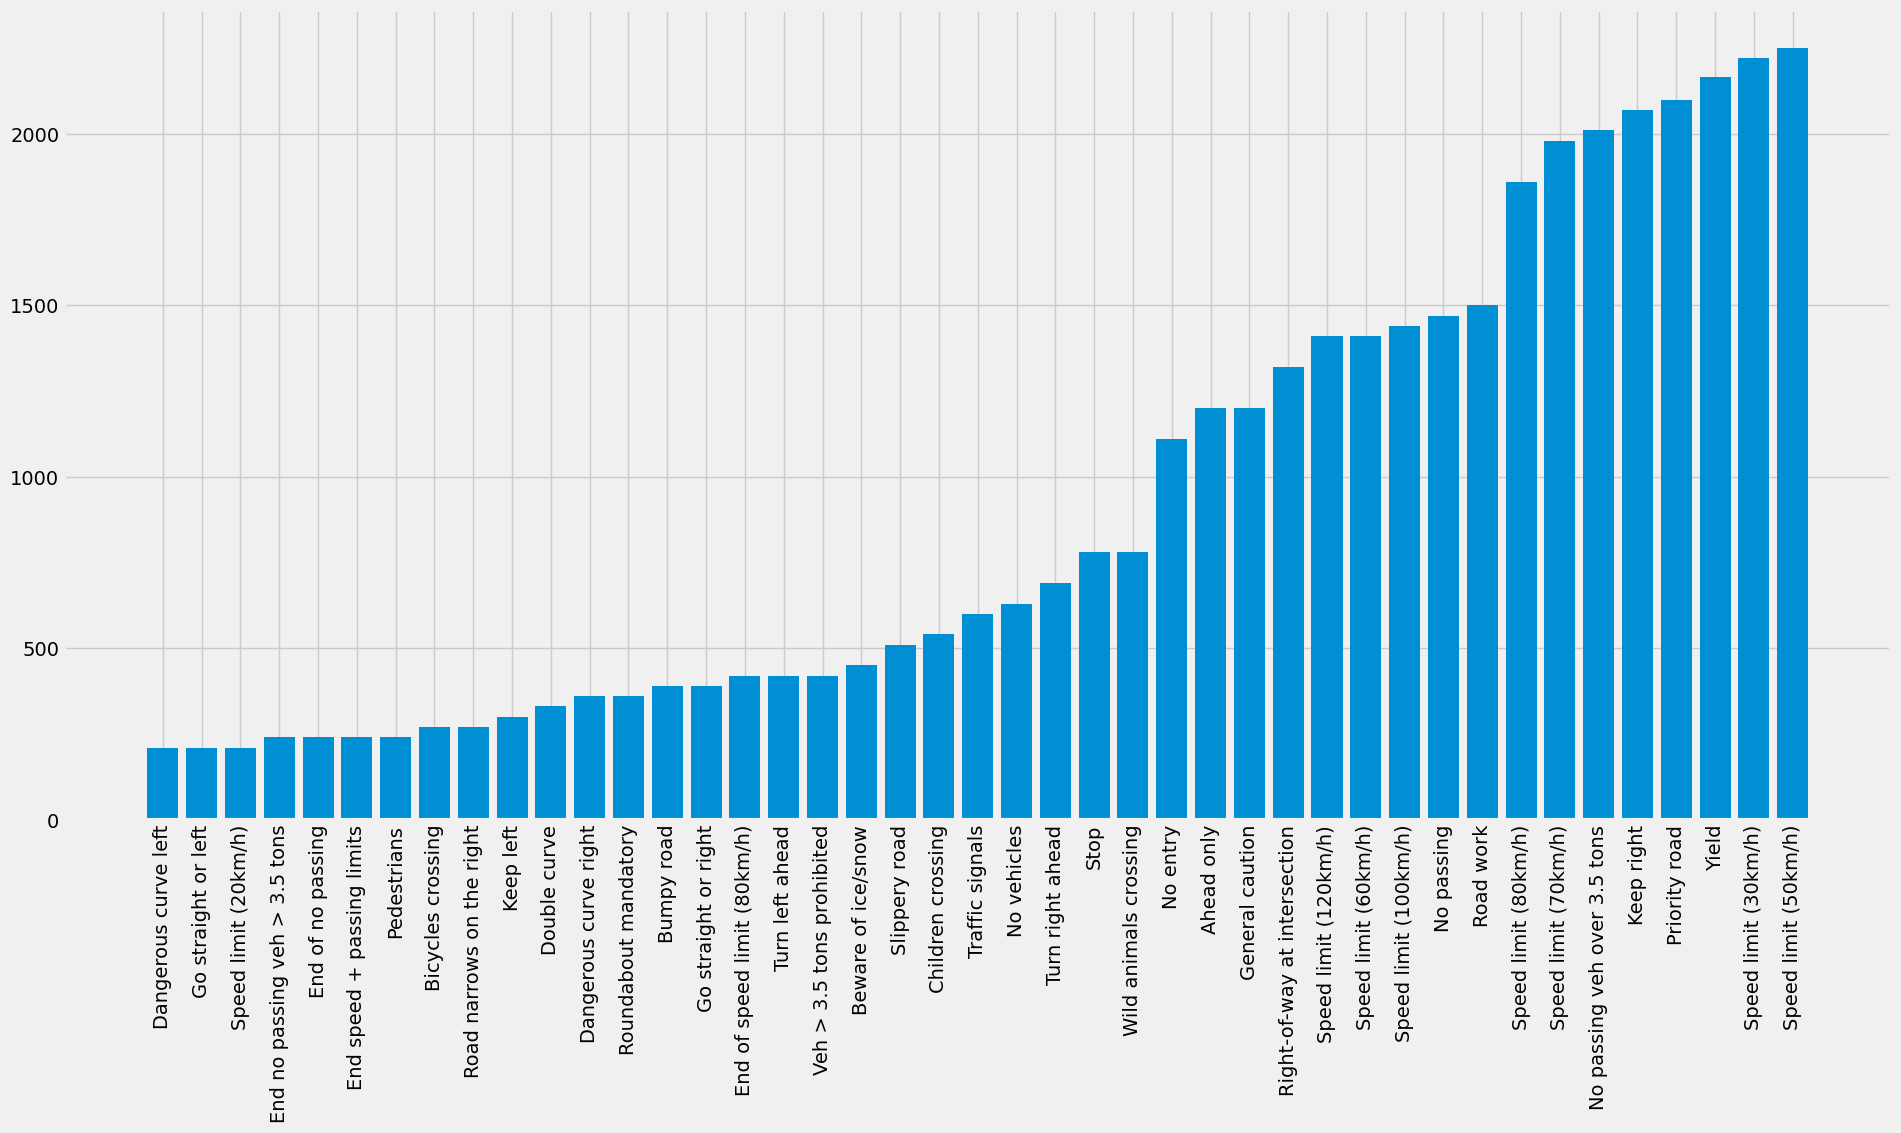

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
# # Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

# plt.figure(figsize=(25,25))

# for i in range(1,26):
#     plt.subplot(5,5,i)
#     random_img_path = data_dir + '/' + random.choice(imgs)
#     rand_img = imread(random_img_path)
#     plt.imshow(rand_img)
#     plt.grid(b=None)
#     plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
#     plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39216, 30, 30, 3) (39216,)


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27451, 30, 30, 3)
X_valid.shape (11765, 30, 30, 3)
y_train.shape (27451,)
y_valid.shape (11765,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27451, 43)
(11765, 43)


In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 25s 18ms/step - loss: 0.9458 - accuracy: 0.7395 - val_loss: 0.1611 - val_accuracy: 0.9431
Epoch 2/30
858/858 [==============================] - 15s 18ms/step - loss: 0.1625 - accuracy: 0.9514 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 3/30
858/858 [==============================] - 15s 18ms/step - loss: 0.0924 - accuracy: 0.9723 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 4/30
858/858 [==============================] - 15s 17ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.0678 - val_accuracy: 0.9769
Epoch 5/30
858/858 [==============================] - 15s 17ms/step - loss: 0.0605 - accuracy: 0.9806 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 6/30
858/858 [==============================] - 15s 18ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0142 - val_accuracy: 0.9959
Epoch 7/30
858/858 [==============================] - 15s 17ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0102 - val_accuracy:

In [ ]:
model.save("model.hcnngtsrb")

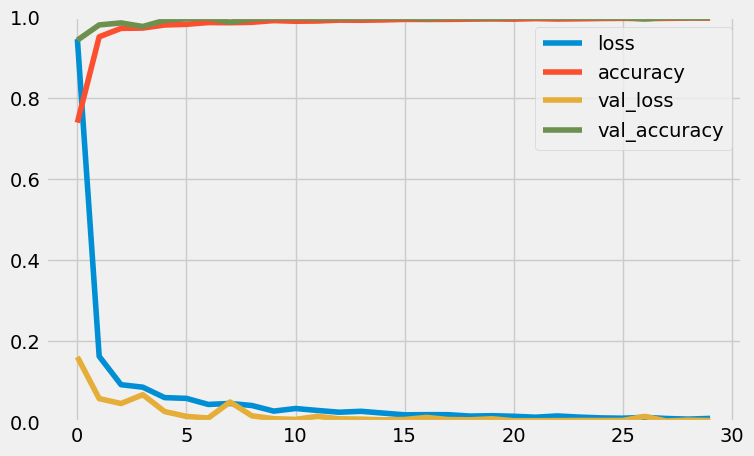

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
        print(img)
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Streaming output truncated to the last 5000 lines.
Test/07630.png
Test/07631.png
Test/07632.png
Test/07633.png
Test/07634.png
Test/07635.png
Test/07636.png
Test/07637.png
Test/07638.png
Test/07639.png
Test/07640.png
Test/07641.png
Test/07642.png
Test/07643.png
Test/07644.png
Test/07645.png
Test/07646.png
Test/07647.png
Test/07648.png
Test/07649.png
Test/07650.png
Test/07651.png
Test/07652.png
Test/07653.png
Test/07654.png
Test/07655.png
Test/07656.png
Test/07657.png
Test/07658.png
Test/07659.png
Test/07660.png
Test/07661.png
Test/07662.png
Test/07663.png
Test/07664.png
Test/07665.png
Test/07666.png
Test/07667.png
Test/07668.png
Test/07669.png
Test/07670.png
Test/07671.png
Test/07672.png
Test/07673.png
Test/07674.png
Test/07675.png
Test/07676.png
Test/07677.png
Test/07678.png
Test/07679.png
Test/07680.png
Test/07681.png
Test/07682.png
Test/07683.png
Test/07684.png
Test/07685.png
Test/07686.png
Test/07687.png
Test/07688.png
Test/07689.png
Test/07690.png
Test/07691.png
Test/07692.png
Test

AttributeError: ignored